In [2]:
import stata_setup

stata_setup.config("C:/Program Files/Stata17", "mp")


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 4-core  perpetual
Serial number: 0
  Licensed to: Stata
               Stata

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


In [3]:
%%stata

sysuse auto, clear

summarize mpg


. 
. sysuse auto, clear
(1978 automobile data)

. 
. summarize mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41

. 


In [6]:
import pandas as pd

import io

import requests

 

data = requests.get("https://www.stata.com/python/pystata/misc/nhanes2.csv").content

nhanes2 = pd.read_csv(io.StringIO(data.decode("utf-8")))

nhanes2.head(5)

,sampl,strata,psu,region,smsa,location,houssiz,sex,race,age,...,region4,smsa1,smsa2,smsa3,rural,loglead,agegrp,highlead,bmi,highbp
0,1400,1,1,S,2,1,4,Male,White,54,...,0,0,1,0,0,NaN,50-59,NaN,20.495686,0
1,1401,1,1,S,2,1,6,Female,White,41,...,0,0,1,0,0,2.564949,40-49,lead<25,21.022337,0
2,1402,1,1,S,1,1,6,Female,Other,21,...,0,1,0,0,0,NaN,20-29,NaN,24.973860,0
3,1404,1,1,S,2,1,9,Female,White,63,...,0,0,1,0,0,NaN,60-69,NaN,35.728722,1
4,1405,1,1,S,1,1,3,Female,White,64,...,0,1,0,0,0,2.995732,60-69,lead<25,27.923803,0


In [7]:
%%stata -d nhanes2 -eret myeret

logistic highbp c.age##c.weight

ereturn list


. 
. logistic highbp c.age##c.weight

Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
----------------------------------------------

In [8]:
myeret ['e(b)'], myeret['e(V)']

(array([[ 1.03035513e-01,  7.83537342e-02, -7.21492384e-04,
         -8.50485078e+00]]),
 array([[ 5.29930771e-05,  3.50509317e-05, -6.97861002e-07,
         -2.69423163e-03],
        [ 3.50509317e-05,  2.60132664e-05, -4.74084051e-07,
         -1.94299575e-03],
        [-6.97861002e-07, -4.74084051e-07,  9.55811835e-09,
          3.50377699e-05],
        [-2.69423163e-03, -1.94299575e-03,  3.50377699e-05,
          1.50887842e-01]]))


. 
. quietly margins, at(age=(20(10)80))

. 
. marginsplot

Variables that uniquely identify margins: age

. 


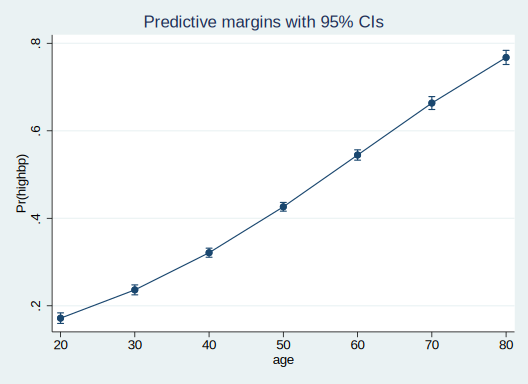

In [9]:
%%stata

quietly margins, at(age=(20(10)80))

marginsplot

In [11]:
%%stata -doutd preddata

quietly margins, at(age=(20(5)80) weight=(40(5)180)) saving(predictions, replace)

use predictions, clear

list _at1 _at2 _margin in 1/5

rename _at1 age

rename _at2 weight

rename _margin pr_highbp


. 
. quietly margins, at(age=(20(5)80) weight=(40(5)180)) saving(predictions, repl
> ace)

. 
. use predictions, clear
(Created by command margins; also see char list)

. 
. list _at1 _at2 _margin in 1/5

     +------------------------+
     | _at1   _at2    _margin |
     |------------------------|
  1. |   20     40   .0200911 |
  2. |   20     45   .0274497 |
  3. |   20     50   .0374008 |
  4. |   20     55   .0507709 |
  5. |   20     60   .0685801 |
     +------------------------+

. 
. rename _at1 age

. 
. rename _at2 weight

. 
. rename _margin pr_highbp

. 


In [12]:
preddata[['age', 'weight', 'pr_highbp']].head()

,age,weight,pr_highbp
0,20,40,0.020091
1,20,45,0.027450
2,20,50,0.037401
3,20,55,0.050771
4,20,60,0.068580


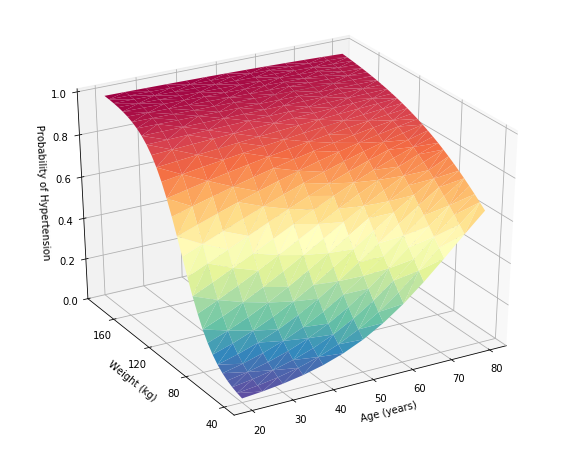

In [18]:
import matplotlib.pyplot as plt

import numpy as np

from mpl_toolkits import mplot3d

# define the axes

fig = plt.figure(1, figsize=(10, 8))

ax = plt.axes(projection='3d')

# plot

ax.plot_trisurf(preddata['age'], preddata['weight'], preddata['pr_highbp'],cmap=plt.cm.Spectral_r)


# set ticks and labels for x, y, and z axes

ax.set_xticks(np.arange(20, 90, step=10))

ax.set_yticks(np.arange(40, 200, step=40))

ax.set_zticks(np.arange( 0, 1.2, step=0.2))

ax.set_xlabel("Age (years)")

ax.set_ylabel("Weight (kg)")

ax.set_zlabel("Probability of Hypertension")
 
# adjust the view angle

ax.view_init(elev=30, azim=240)

# show the plot

plt.show()


. 
. clear

. 
. use https://www.stata-press.com/data/r17/bcgset
(Efficacy of BCG vaccine against tuberculosis; set with -meta esize-)

.     
. meta forestplot

  Effect-size label: Log risk-ratio
        Effect size: _meta_es
          Std. err.: _meta_se
        Study label: studylbl

. 


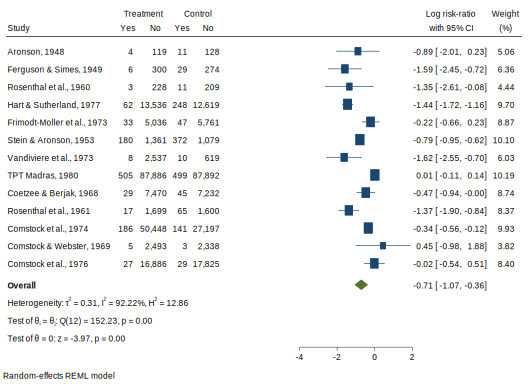

In [22]:
%%stata

clear

use https://www.stata-press.com/data/r17/bcgset
    
meta forestplot


. 
. meta forestplot

  Effect-size label: Log risk-ratio
        Effect size: _meta_es
          Std. err.: _meta_se
        Study label: studylbl

. 


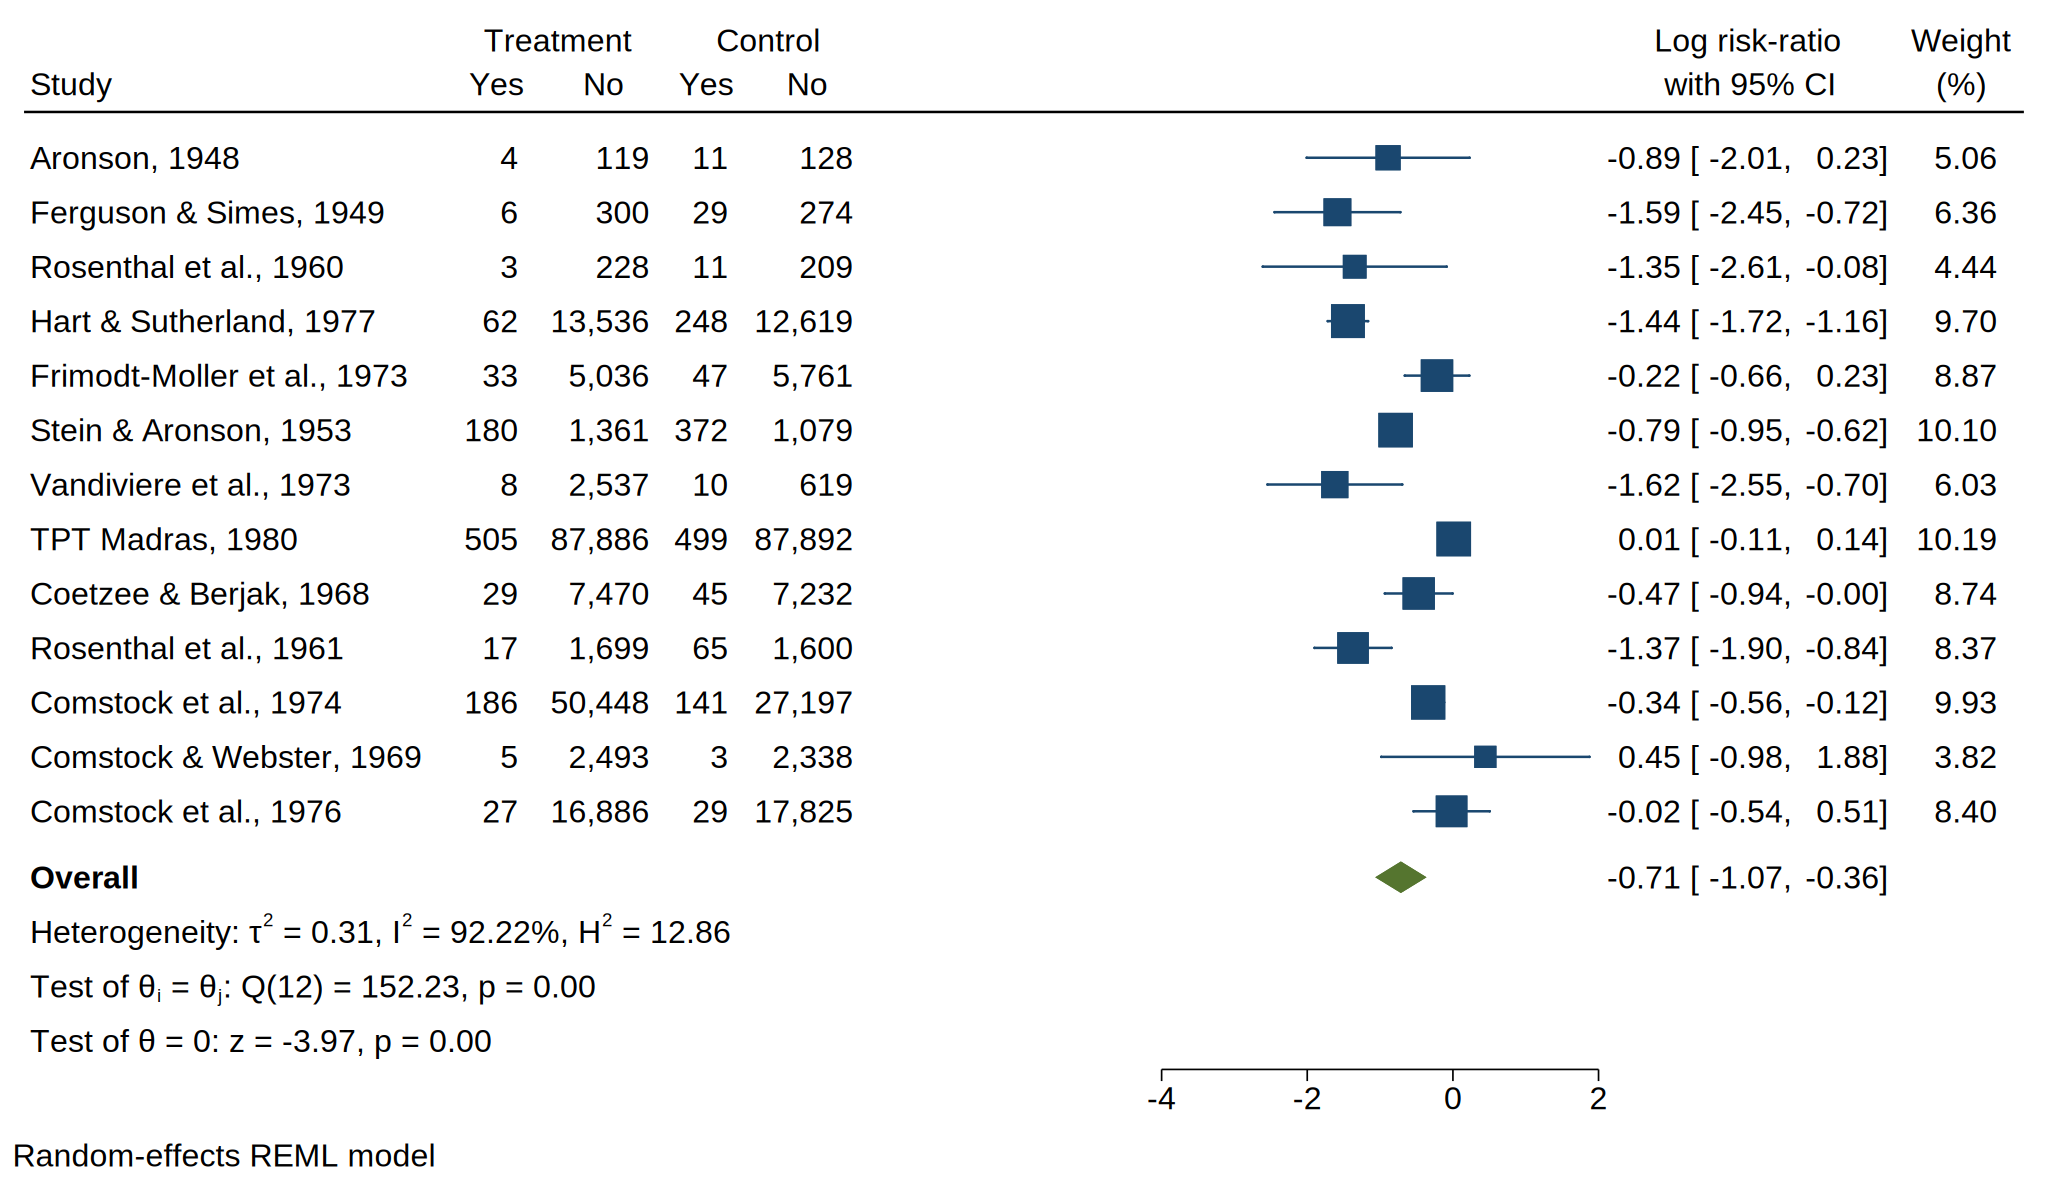

In [23]:
%%stata -gw 8in

meta forestplot